In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set random seed.
np.random.seed(42)

# Read the processed CSV file.
df = pd.read_csv("ms_data.csv")

# Convert visit_date to datetime.
df['visit_date'] = pd.to_datetime(df['visit_date'])

#  Sort by patient_id and visit_date.
df = df.sort_values(by = ['patient_id', 'visit_date'])

# Read insurance types from `insurance.lst`.
with open('insurance.lst', 'r') as f:
    insurance_types = [line.strip() for line in f.readlines()]

# Randomly assign (but keep consistent per patient_id).
unique_patients = df['patient_id'].unique()
patient_insurance_map = {patient_id: np.random.choice(insurance_types) for patient_id in unique_patients}
df['insurance_type'] = df['patient_id'].map(patient_insurance_map)

# Generate visit costs based on insurance type. Different plans have different effects on cost.
base_costs = {'Medicare': 100,
    'Medicaid': 200,
    'Private': 50,
    'Other': 500
}

# Add random variation.
variation_factor = 0.2 # 20% variation
df['visit_cost'] = df['insurance_type'].map(base_costs) * (1 + np.random.uniform(-variation_factor, variation_factor, len(df))).round(3)

# Set appropriate data types.
df['patient_id'] = df['patient_id'].astype(str)
df['education_level'] = df['education_level'].astype(str)
df['insurance_type'] = df['insurance_type'].astype(str)

# Spring: March, April, May (months 3, 4, 5)
# Summer: June, July, August (months 6, 7, 8)
# Fall: September, October, November (months 9, 10, 11)
# Winter: December, January, February (months 12, 1, 2)

# Add a 'season' column based on the month of the visit_date
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Apply the get_season function to the 'visit_date' to categorize the season
df['season'] = df['visit_date'].dt.month.apply(get_season)

df.head()

,patient_id,visit_date,age,education_level,walking_speed,insurance_type,visit_cost,season
0,P0001,2020-01-23,34.28,Bachelors,4.40,Private,53.95,Winter
1,P0001,2020-04-16,34.51,Bachelors,4.19,Private,50.70,Spring
2,P0001,2020-07-03,34.72,Bachelors,4.71,Private,46.20,Summer
3,P0001,2020-10-15,35.00,Bachelors,4.86,Private,56.30,Fall
4,P0001,2020-12-29,35.21,Bachelors,4.50,Private,53.70,Winter


Create visualizations for both walking speed and cost analyses in a Jupyter notebook:

1. Walking speed analysis:
   - Scatter plot of age vs walking speed with regression line
   - Box plots by education level
   - Line plot showing education age interaction

<Figure size 1000x600 with 0 Axes>

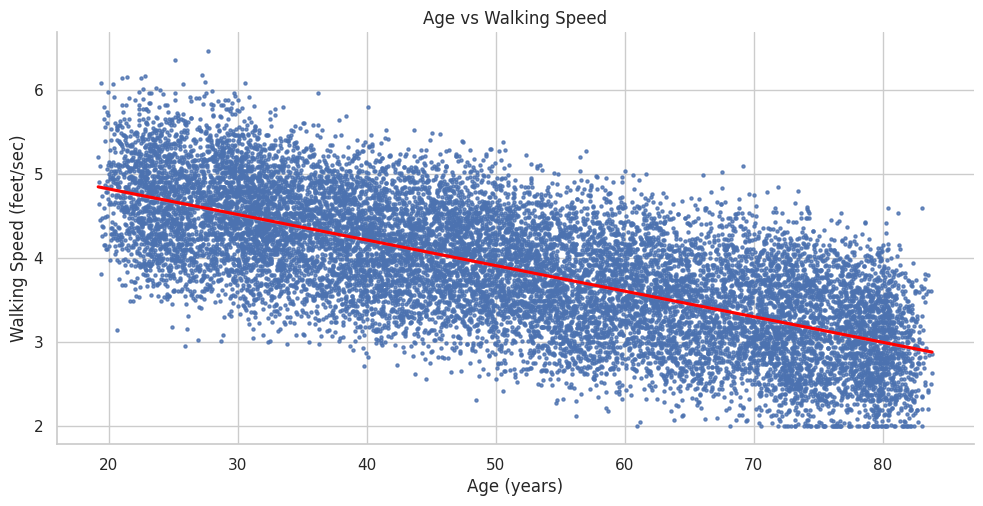

In [12]:
# Setting up the visualization theme
sns.set_theme(style="whitegrid")

# Scatter plot of age vs walking speed with regression line
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='age', y='walking_speed', aspect=2, line_kws={'color': 'red'}, scatter_kws={"s": 5})
plt.title("Age vs Walking Speed")
plt.xlabel("Age (years)")
plt.ylabel("Walking Speed (feet/sec)")
plt.savefig("age_vs_walking_speed.png", dpi=300)
plt.show()

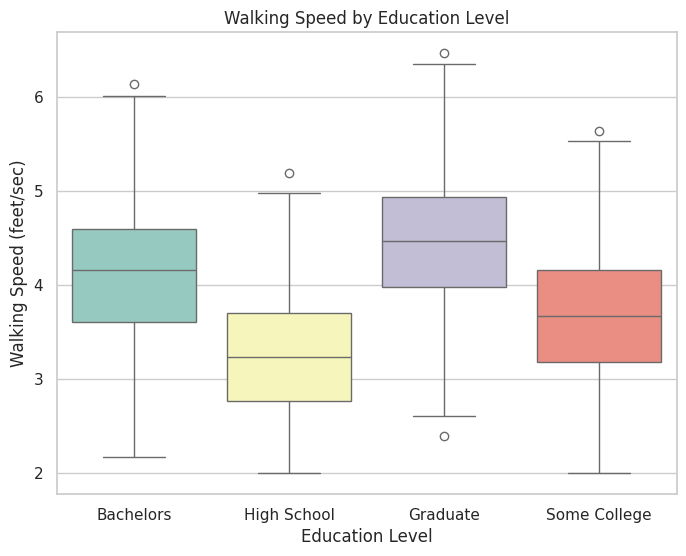

In [ ]:
# Box plot of walking speed by education level
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='education_level', y='walking_speed', palette='Set3', hue='education_level', legend=False)
plt.title("Walking Speed by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Walking Speed (feet/sec)")
plt.savefig("boxplot_walking_speed.png", dpi=300)
plt.show()

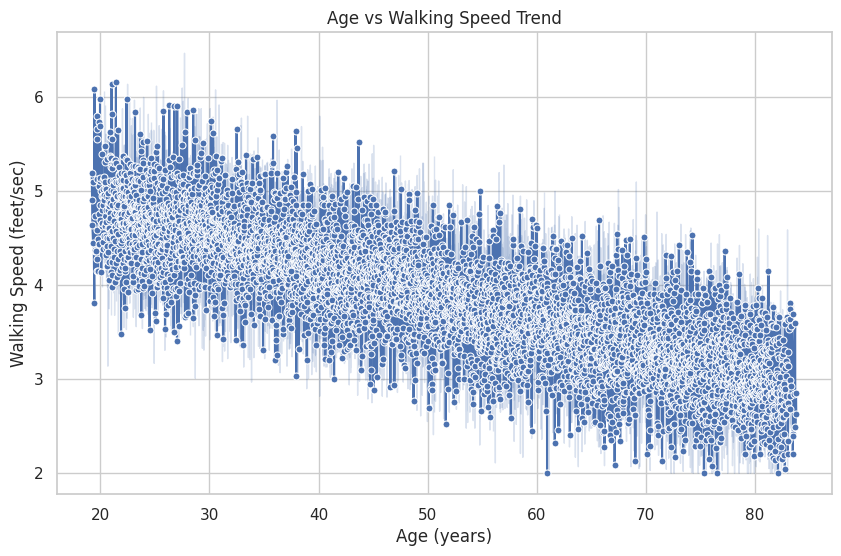

In [ ]:
# Line plot showing age and walking speed interaction
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='age', y='walking_speed', marker='o', markersize=1)
plt.title("Age vs Walking Speed Trend")
plt.xlabel("Age (years)")
plt.ylabel("Walking Speed (feet/sec)")
plt.savefig("lineplot_age_walking_speed.png", dpi=300)
plt.show()

Create visualizations for both walking speed and cost analyses in a Jupyter notebook:

2. Cost analysis:
   - Bar plot of mean costs by insurance type
   - Box plots showing cost distributions
   - Add error bars or confidence intervals

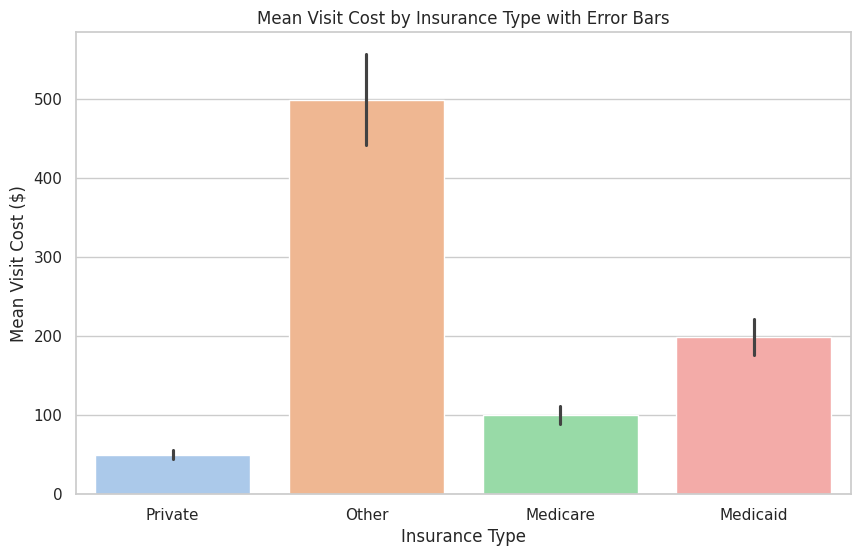

In [ ]:
# Bar plot of mean visit costs by insurance type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='insurance_type', y='visit_cost', errorbar='sd', palette='pastel', hue='insurance_type')
plt.title("Mean Visit Cost by Insurance Type")
plt.xlabel("Insurance Type")
plt.ylabel("Mean Visit Cost ($)")
plt.savefig("barplot_visit_cost.png", dpi=300)
plt.show()

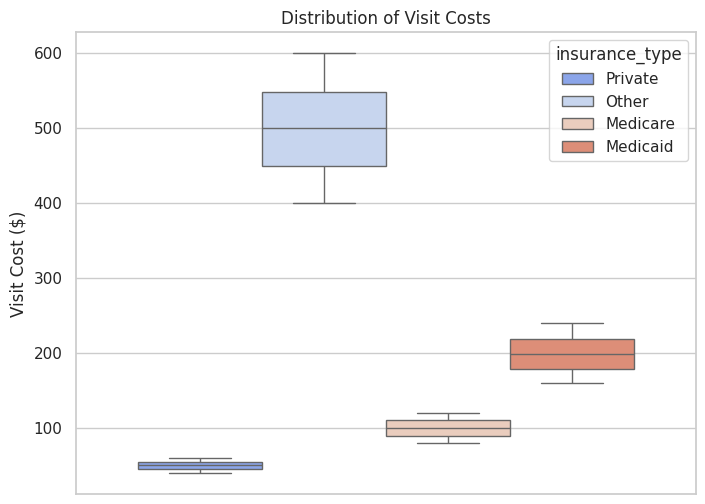

In [23]:
# Box plot showing cost distributions
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='visit_cost', palette='coolwarm', hue = 'insurance_type')
plt.title("Distribution of Visit Costs")
plt.ylabel("Visit Cost ($)")
plt.savefig("boxplot_visit_cost.png", dpi=300)
plt.show()

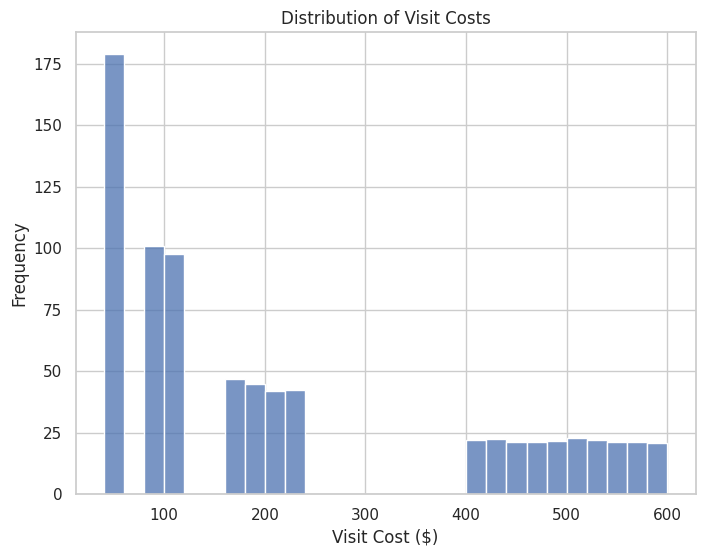

In [30]:
# Box plot showing cost distributions
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='visit_cost', stat='frequency',binwidth = 20)
plt.title("Distribution of Visit Costs")
plt.xlabel("Visit Cost ($)")
plt.savefig("boxplot_visit_cost_distribution.png", dpi=300)
plt.show()

Create visualizations for both walking speed and cost analyses in a Jupyter notebook:

3. Combined visualizations:
   - Pair plot of key variables
   - Faceted plots by education/insurance
   - Time trends where relevant

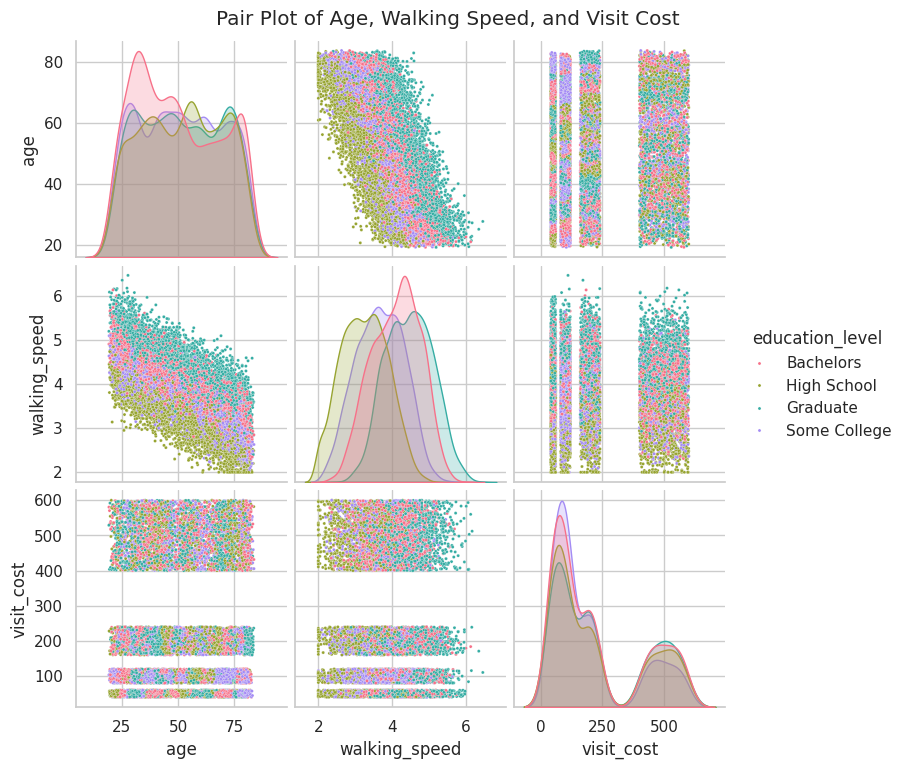

In [33]:
# Pair plot of key variables
sns.pairplot(df, vars=['age', 'walking_speed', 'visit_cost'], hue='education_level', palette='husl', plot_kws={'s': 5})
plt.suptitle("Pair Plot of Age, Walking Speed, and Visit Cost", y=1.02)
plt.savefig("pairplot_key_variables.png", dpi=300)
plt.show()

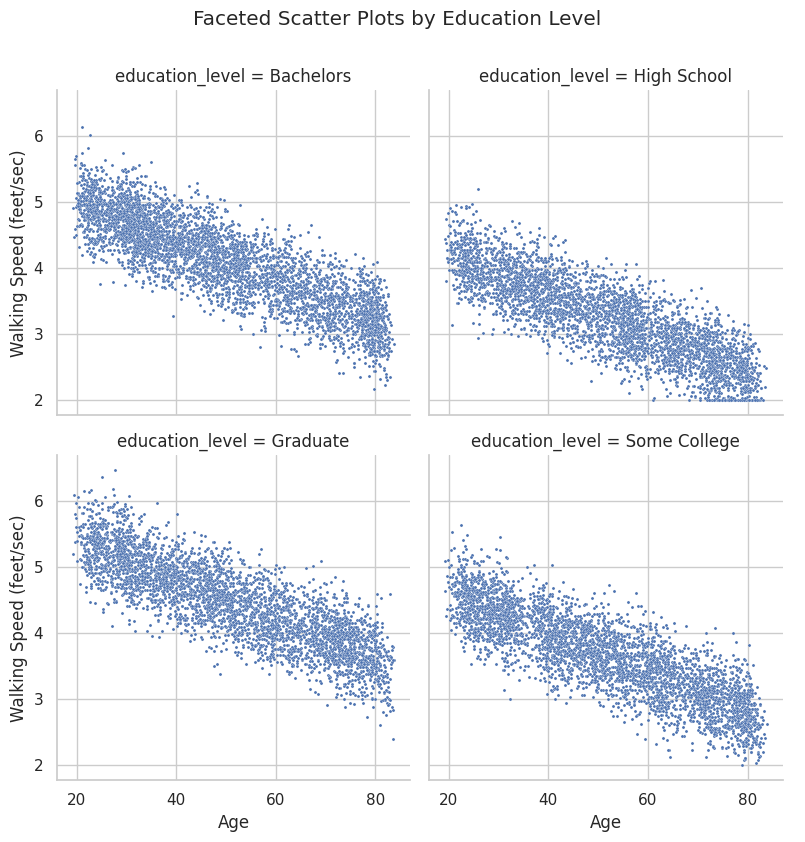

In [38]:
# Faceted plots by education level for walking speed
g = sns.FacetGrid(df, col='education_level', col_wrap=2, height=4, palette='Set2')
g.map(sns.scatterplot, 'age', 'walking_speed', s=5)
g.set_axis_labels("Age", "Walking Speed (feet/sec)")
g.add_legend()
g.fig.suptitle("Faceted Scatter Plots by Education Level", y=1.05)
g.savefig("facet_scatter_education.png", dpi=300)
plt.show()

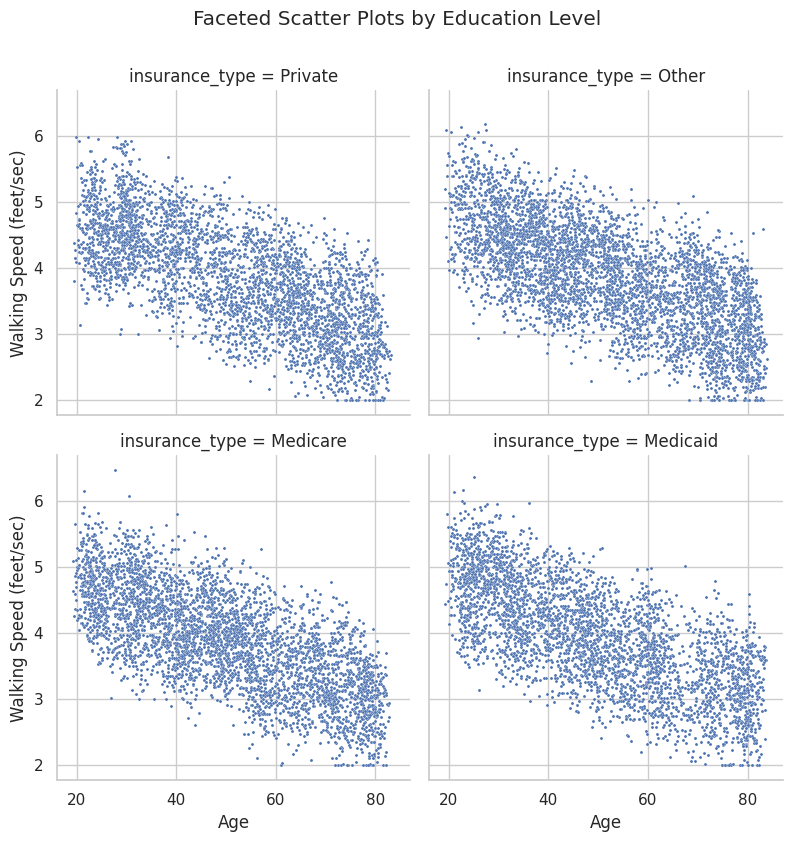

In [39]:
# Faceted plots by insurance type for walking speed
g = sns.FacetGrid(df, col='insurance_type', col_wrap=2, height=4, palette='Set2')
g.map(sns.scatterplot, 'age', 'walking_speed', s=5)
g.set_axis_labels("Age", "Walking Speed (feet/sec)")
g.add_legend()
g.fig.suptitle("Faceted Scatter Plots by Education Level", y=1.05)
g.savefig("facet_scatter_insurance.png", dpi=300)
plt.show()

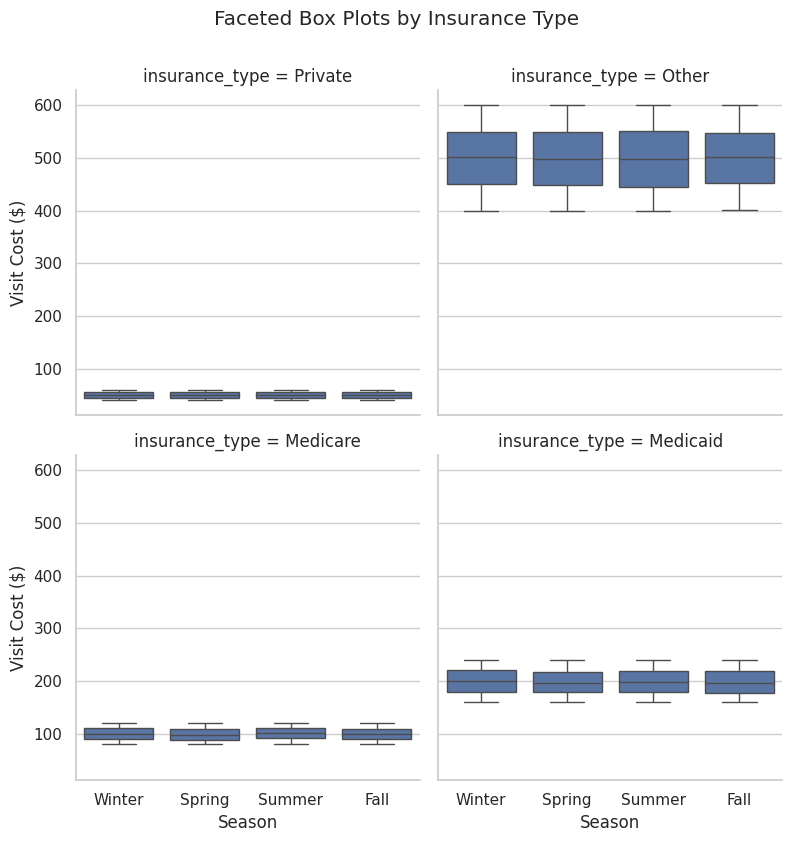

In [42]:
# Faceted plots by insurance type for visit cost
g = sns.FacetGrid(df, col='insurance_type', col_wrap=2, height=4, palette='Set1')
g.map(sns.boxplot, 'season', 'visit_cost', order=['Winter', 'Spring', 'Summer', 'Fall'])
g.set_axis_labels("Season", "Visit Cost ($)")
g.add_legend()
g.fig.suptitle("Faceted Box Plots by Insurance Type", y=1.05)
g.savefig("facet_box_insurance.png", dpi=300)
plt.show()

In [ ]:
# Time trends for walking speed and visit cost
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='visit_date', y='walking_speed', marker='o', label='Walking Speed', markersize=1)
sns.lineplot(data=df, x='visit_date', y='visit_cost', marker='o', label='Visit Cost', color='orange', markersize=1)
plt.title("Time Trends for Walking Speed and Visit Cost")
plt.xlabel("Visit Date")
plt.ylabel("Values")
plt.legend()
plt.savefig("time_trends_walking_cost.png", dpi=300)
plt.show()